Question:
You are provided with the California Housing dataset, which contains information about various factors affecting house prices 
in California. Your task is to perform an end-to-end analysis, including data exploration, visualization, and the development 
of a simple linear regression model to predict house prices based on the available features. Present your findings and insights 
in a well-documented Jupyter notebook.

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [17]:
# Load dataset
cali = fetch_california_housing()
df = pd.DataFrame(cali.data, columns=cali.feature_names)

In [19]:
# Add target to the DataFrame
df['MedHouseVal'] = cali.target

In [21]:
# Display first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Data Exploration and Cleaning

In [23]:
# Summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
# Check for missing values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

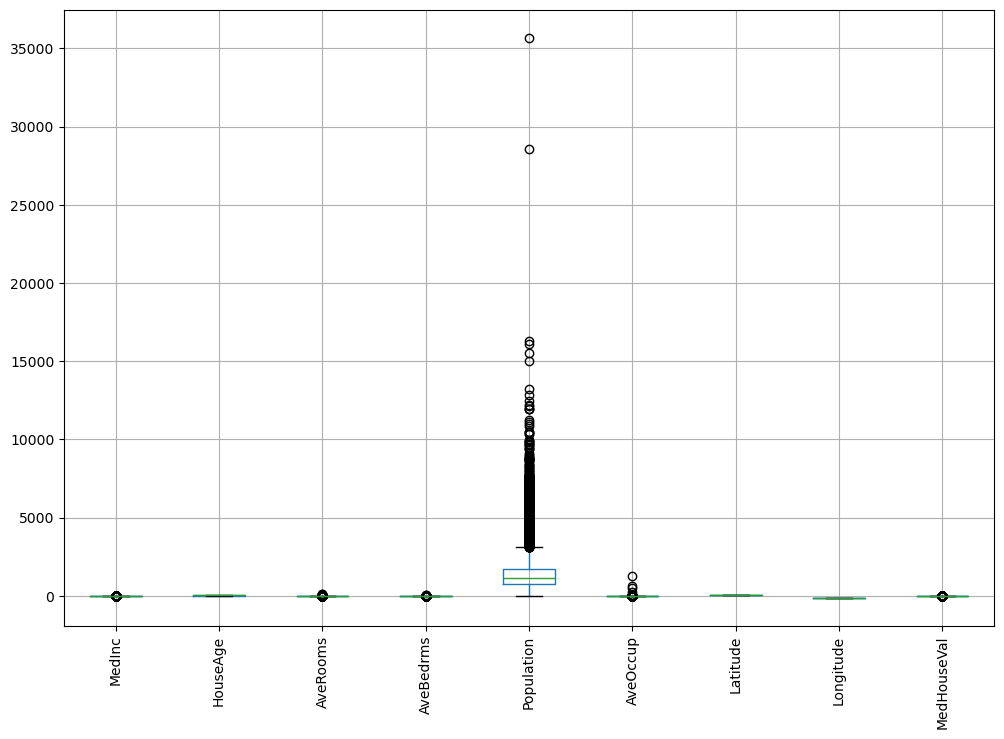

In [27]:
# Optional: Visualize outliers using boxplots
import matplotlib.pyplot as plt
df.boxplot(figsize=(12,8))
plt.xticks(rotation=90)
plt.show()

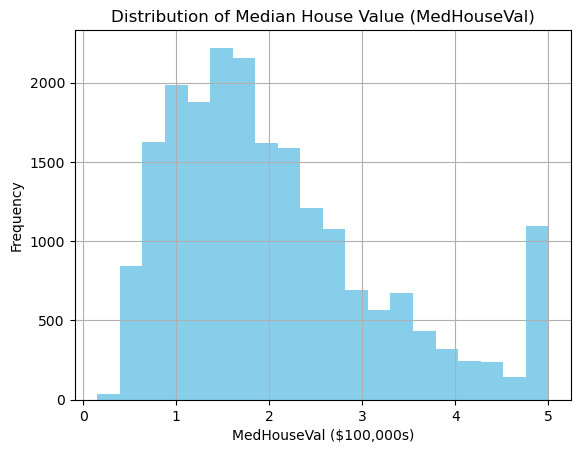

In [28]:
# Histogram of target variable
df['MedHouseVal'].hist(bins=20, color='skyblue')
plt.title('Distribution of Median House Value (MedHouseVal)')
plt.xlabel('MedHouseVal ($100,000s)')
plt.ylabel('Frequency')
plt.show()

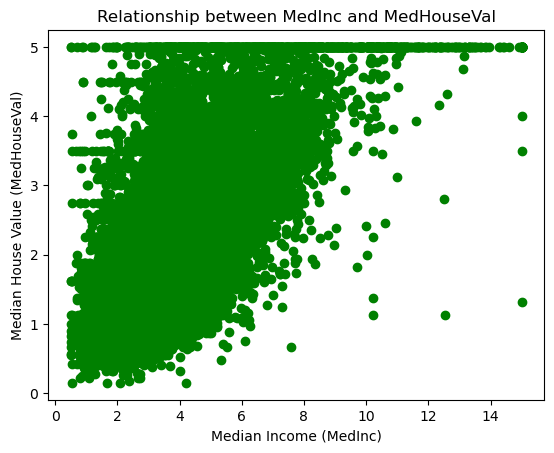

In [31]:
# Scatter plot example: MedInc vs MedHouseVal
plt.scatter(df['MedInc'], df['MedHouseVal'], color='green')
plt.title('Relationship between MedInc and MedHouseVal')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.show()

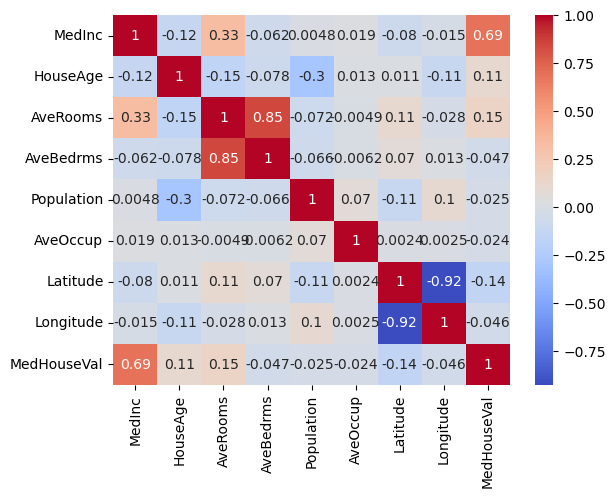

In [33]:
# Correlation matrix
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Feature Engineering

In [36]:
import numpy as np

# Example: Log transform of MedHouseVal to normalize the distribution
df['LOG_MedHouseVal'] = np.log(df['MedHouseVal'])

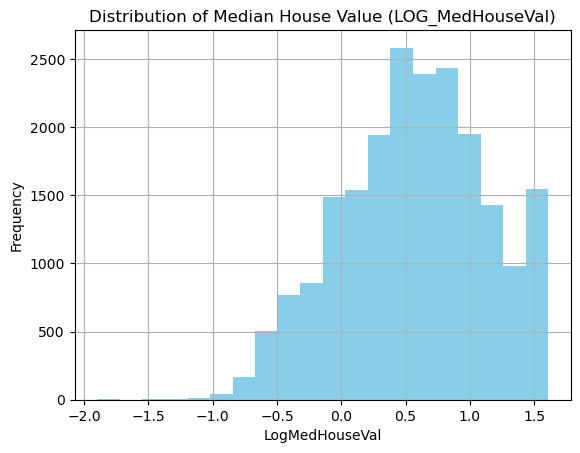

In [38]:
# Histogram of target variable
df['LOG_MedHouseVal'].hist(bins=20, color='skyblue')
plt.title('Distribution of Median House Value (LOG_MedHouseVal)')
plt.xlabel('LogMedHouseVal')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Example: Interaction term
df['MedInc_HouseAge'] = df['MedInc'] * df['HouseAge']

Modeling

Task: Split the data into training and testing sets, and build a linear regression model to predict MedHouseVal. Evaluate the model's performance.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
# Split the data
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,LOG_MedHouseVal,MedInc_HouseAge
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1.509839,341.3332
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1.276758,174.3294
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.258745,377.3848
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.227592,293.4412
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.230225,200.0024


In [52]:
# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.11835363528409644


Interpretation and Reporting

Task: Interpret the model results